<a href="https://colab.research.google.com/github/EZZY619/EZZY619/blob/main/augluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Uninstall the Colab pre-installed versions that cause conflicts
!pip uninstall -y torch torchvision torchaudio scikit-learn -q

# 2. Install AutoGluon (This pulls in the correct fresh versions of everything)
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

# 1. Use a reliable URL for the Titanic dataset
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = TabularDataset(data_url)

# 2. Train the Model
# We set time_limit=60 (1 minute) to keep it fast
# presets='medium_quality' ensures it runs smoothly on Colab without running out of RAM
predictor = TabularPredictor(label='Survived').fit(data, time_limit=60, presets='medium_quality')

# 3. Show me the Winner
print(predictor.leaderboard())

No path specified. Models will be saved in: "AutogluonModels/ag-20251123_155757"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       11.46 GB / 12.67 GB (90.4%)
Disk Space Avail:   63.32 GB / 107.72 GB (58.8%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "/content/AutogluonModels/ag-20251123_155757"
Train Data Rows:    891
Train Data Columns: 11
Label Column:       Survived
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [np.int64(0), np.int64(1)]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter durin

                  model  score_val eval_metric  pred_time_val   fit_time  \
0   WeightedEnsemble_L2   0.871508    accuracy       0.026119  13.171796   
1        NeuralNetTorch   0.849162    accuracy       0.019018  11.238267   
2              CatBoost   0.826816    accuracy       0.005096   1.829524   
3       NeuralNetFastAI   0.826816    accuracy       0.018101   2.715732   
4              LightGBM   0.821229    accuracy       0.005612   0.481311   
5            LightGBMXT   0.815642    accuracy       0.005751  11.611829   
6         LightGBMLarge   0.815642    accuracy       0.006955   1.054151   
7               XGBoost   0.815642    accuracy       0.010154   0.727725   
8      RandomForestGini   0.815642    accuracy       0.071768   1.298652   
9        ExtraTreesGini   0.815642    accuracy       0.090048   0.933333   
10     RandomForestEntr   0.815642    accuracy       0.098965   1.555325   
11       ExtraTreesEntr   0.810056    accuracy       0.103279   1.062676   

    pred_ti

Computing feature importance via permutation shuffling for 11 features using 891 rows with 5 shuffle sets...


Calculating feature importance... this takes a moment...


	13.8s	= Expected runtime (2.76s per shuffle set)
	2.28s	= Actual runtime (Completed 5 of 5 shuffle sets)


        importance    stddev   p_value  n  p99_high   p99_low
Sex       0.115152  0.006715  0.000001  5  0.128978  0.101325
Name      0.081481  0.012130  0.000057  5  0.106456  0.056507
Ticket    0.062626  0.006467  0.000013  5  0.075942  0.049311
Pclass    0.046914  0.006319  0.000039  5  0.059925  0.033903
Age       0.034119  0.005240  0.000065  5  0.044909  0.023329


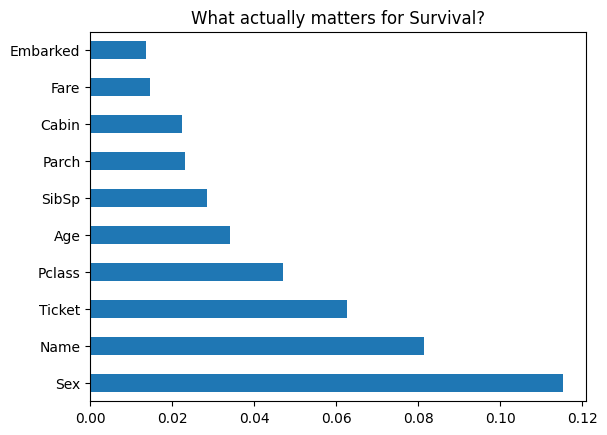

In [3]:
# 1. Ask AutoGluon to "stress test" the features
# (It scrambles data to see what breaks the model)
print("Calculating feature importance... this takes a moment...")
importance = predictor.feature_importance(data)

# 2. Show the top 5 factors that determine survival
print(importance.head())

# 3. Visualize it (Bar Chart)
# This creates a pandas plot directly in the notebook
import matplotlib.pyplot as plt
importance['importance'].head(10).plot(kind='barh')
plt.title("What actually matters for Survival?")
plt.show()

In [4]:
# We know 'Sex' is important, but WHO did it favor?
# Let's group the raw data by Sex and calculate the survival rate.

survival_rates = data.groupby('Sex')['Survived'].mean() * 100

print("Survival Rates by Gender:")
print(survival_rates)

Survival Rates by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [6]:
import pandas as pd

# 1. Create Jack with ALL columns required by the model
jack_dawson = pd.DataFrame({
    'PassengerId': [999],        # Dummy ID
    'Pclass': [3],
    'Name': ['Jack Dawson'],     # Dummy Name
    'Sex': ['male'],
    'Age': [20],
    'SibSp': [0],
    'Parch': [0],
    'Ticket': ['A/5 21171'],     # Dummy Ticket
    'Fare': [7.25],
    'Cabin': [None],             # It's okay to have missing values (None), but the COLUMN must exist
    'Embarked': ['S']
})

# 2. Now the shape matches perfectly
print("Predicting for Jack...")
prediction = predictor.predict(jack_dawson)
probability = predictor.predict_proba(jack_dawson)

# 3. The Verdict
status = "Survived" if prediction.iloc[0] == 1 else "Died"
print(f"Jack's Fate: {status}")
print(f"Confidence: {probability.iloc[0][1]:.1%}")

Predicting for Jack...
Jack's Fate: Died
Confidence: 14.8%
